# Workshop - Building a neural network

Hello all - welcome to the final workbook for the DAIM - Images course. Throughout this notebook, you will be introduced to more advanced aspects of Python. We will go through designing, testing, and evaluating a neural network from scratch in Python, which will give you insight into how to build basic machine learning models for other applications, and should give you a good starting point for further learning in the world of data science.

This workbook will be run over several workshops, and will require time spent outside of the workshops to complete. We would encourage you to use the sources of online support that we have used in previous sessions to help you. The only way to learn how to code is through doing it and solving problems!

By the end of this workshop, you should be able to:
* *to be completed*

## Introduction - The Dataset

The dataset that we will use for this workbook is [this one](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/data): a dataset of 5,863 plain chest XRs which have been labelled by clinicians as either:

1. Normal
2. Pneumonia

Have a read about the dataset via the link above and think about the following:

1. What limitations might this labelling scheme have?
2. Are there any sources of clinical bias that could be introduced?
3. Can you think of any disadvantages of the image encoding they have used?

If you would like to read more about this dataset, you can refer to [this publication](https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5).

The reason we have chosen this dataset for this exercise is the small size (2GB) and simple labelling. Many medical machine learning datasets run into the terabyte range, and have many labels associated with each datapoint. Starting here will give you a better insight into how these models actually work.

To download the model, execute the following commands in the Colab workbook:

In [2]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

If these commands are successful, you should see lots of lines of terminal output as the `unzip` command unzips each of the ~5000 images.

*NB if you are running these commands locally, enter them into your terminal window without the preceding "!"*
*The "!" tells Colab to run this command as a terminal command on the server that we are running, rather than as a line of Python code.*

# Stage One - Inspecting the dataset

We've downloaded the data - what form is it in? This will be vital to understanding how to preprocess it into a form that a neural network can be trained on.

In any dataset, there will be the raw data (images, time-series data, etc.) and semantic labels. The term "semantic" in this context refers to giving data "meaning" - your computer doesn't know what the image data contains unless you label it.

The labels describe the attribute that you want to predict with your model. Common formats for these include:

1. Raw data sorted into directories
2. A large table detailing the datapoints with their associated semantic labels, stored as a CSV file.

Which of the above categories does our data, `chest_xray`, fall in to? To see the data, select the folder icon on the left-hand side of the screen, or navigate to the directory that you are running this workbook from.

## How machine learning datasets are split

This dataset is split into 3 folders: test, train, and validation. For a recap from the seminar:

1. Training data is the largest partition of the dataset and is what is used to update the weights of the model during training.
2. Testing data is used to test the data at the end of training - a finals exam. The model never "sees" any of this data at any point during training.
3. Validation - this data is used to evaluate the model during training. The model is not trained on this data.

If you are collecting this data in the real world, the dataset will often not be split like this, and it is the job of the data scientist to partition it appropriately.

## Exercise 1 - Opening an image

Let's start by displaying a few images from the dataset. Open and display the first few normal images from the `chest_xray/test` directory. *Hint: use the os.listdir() and os.path.join() methods.*

*NB: ignore the* `chest_xray/chest_xray` *subdirectory for the rest of the practical.*

In [ ]:
# Type your code here...

### Solution 1

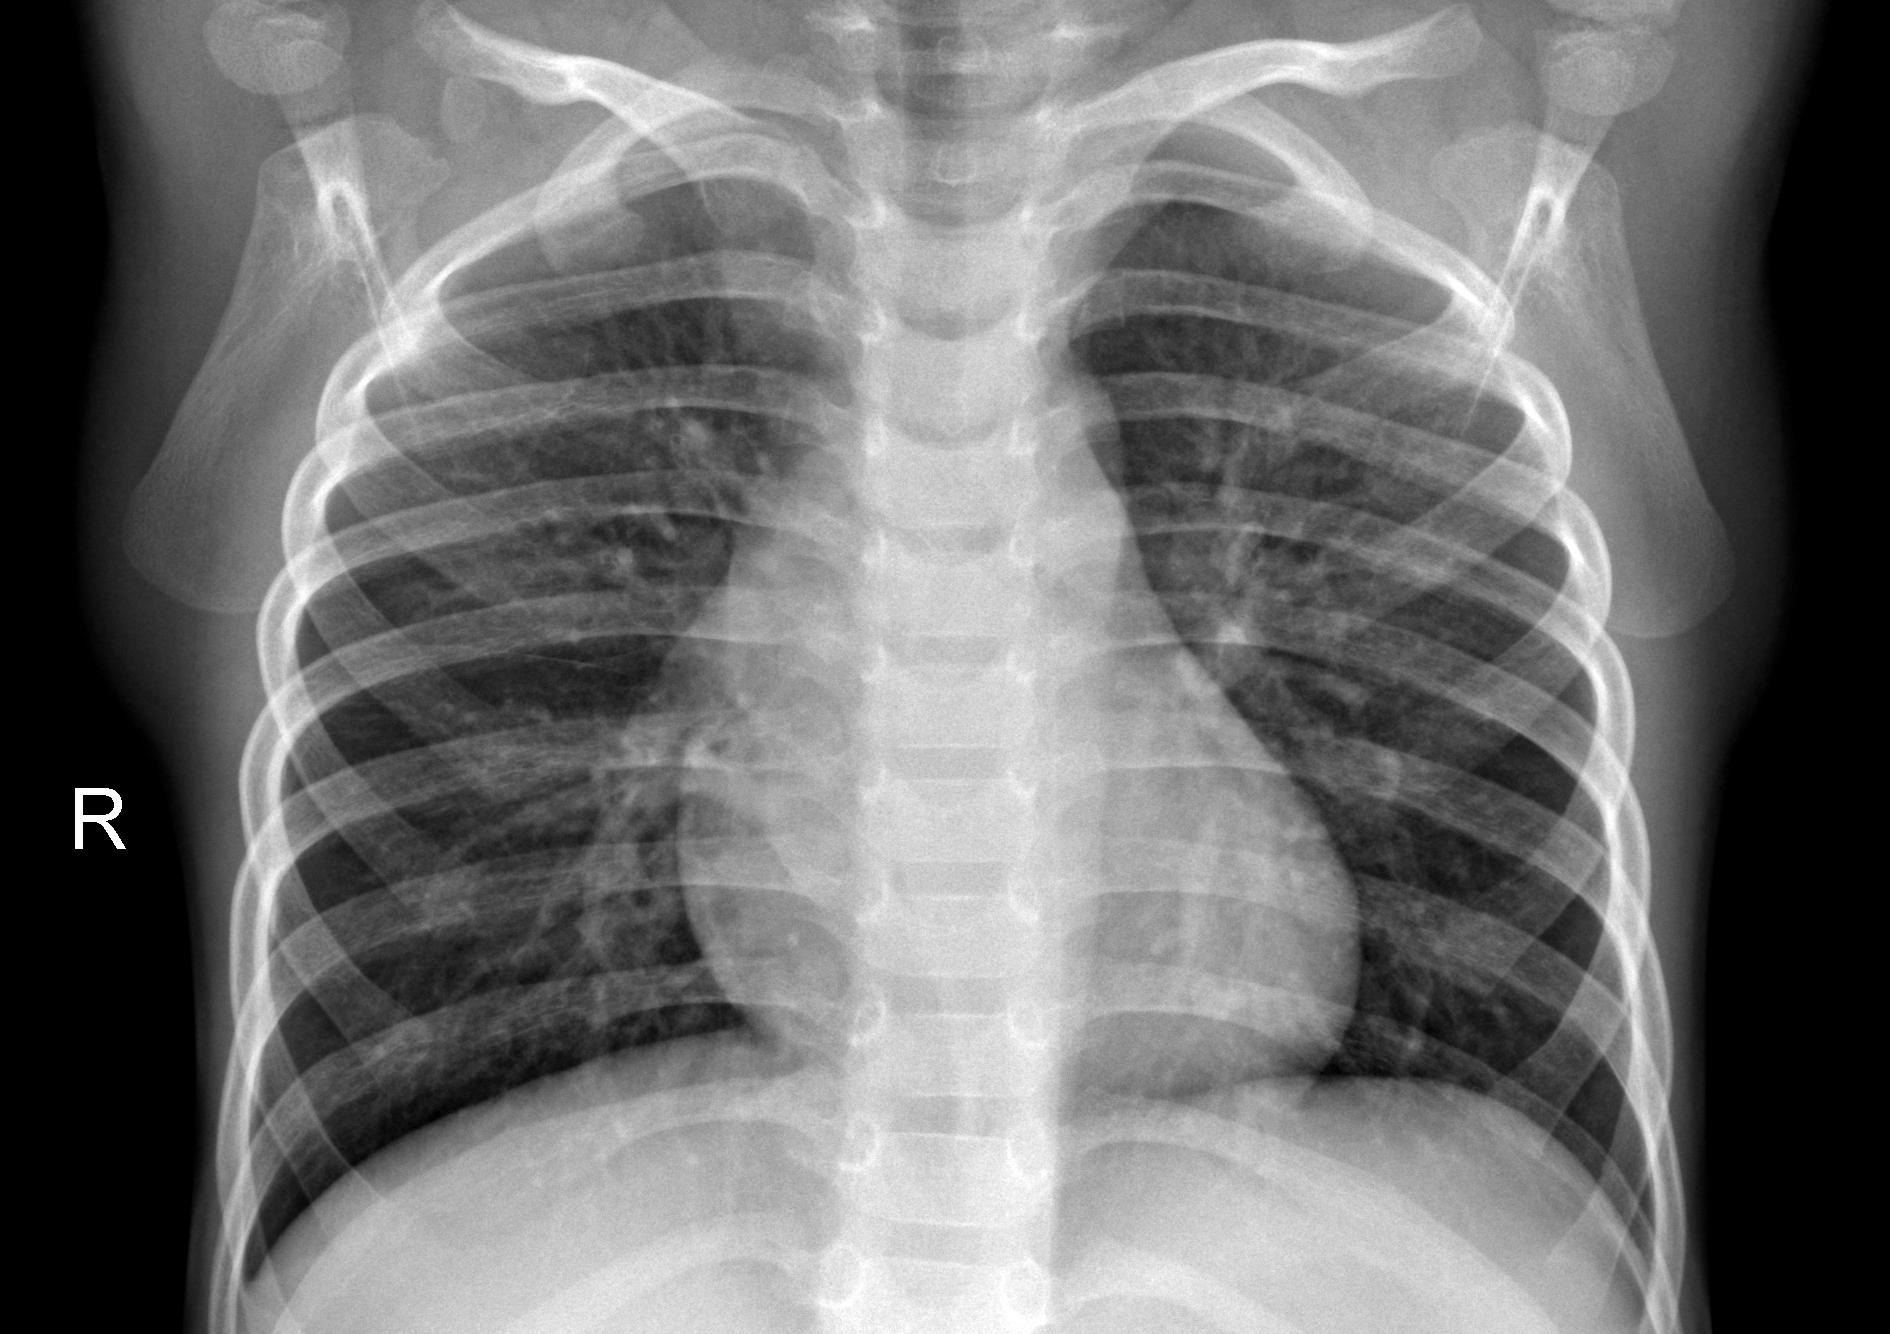

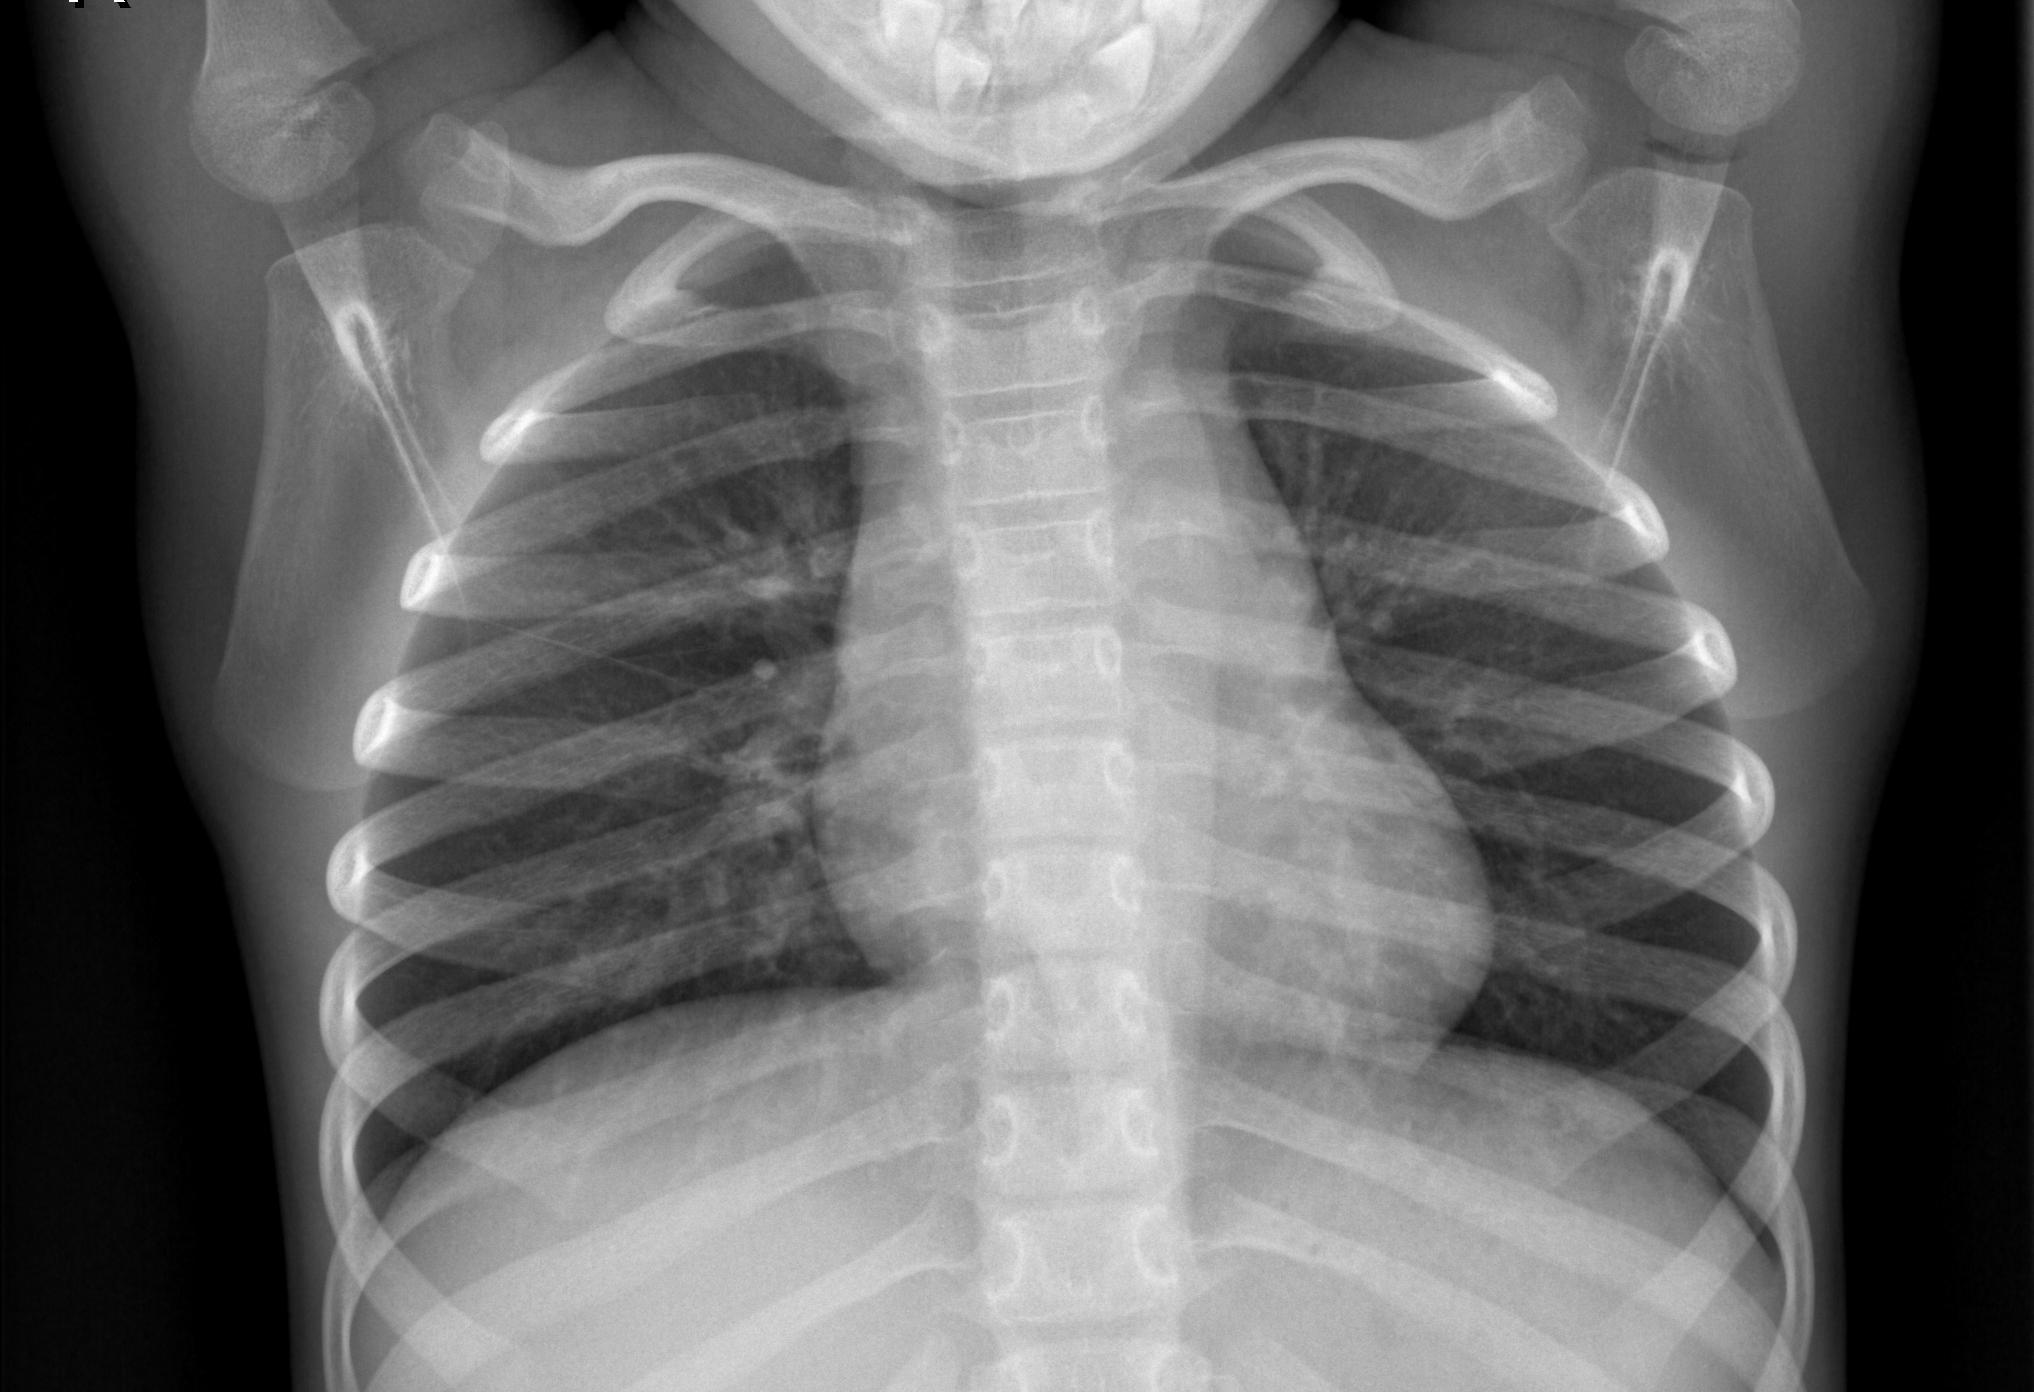

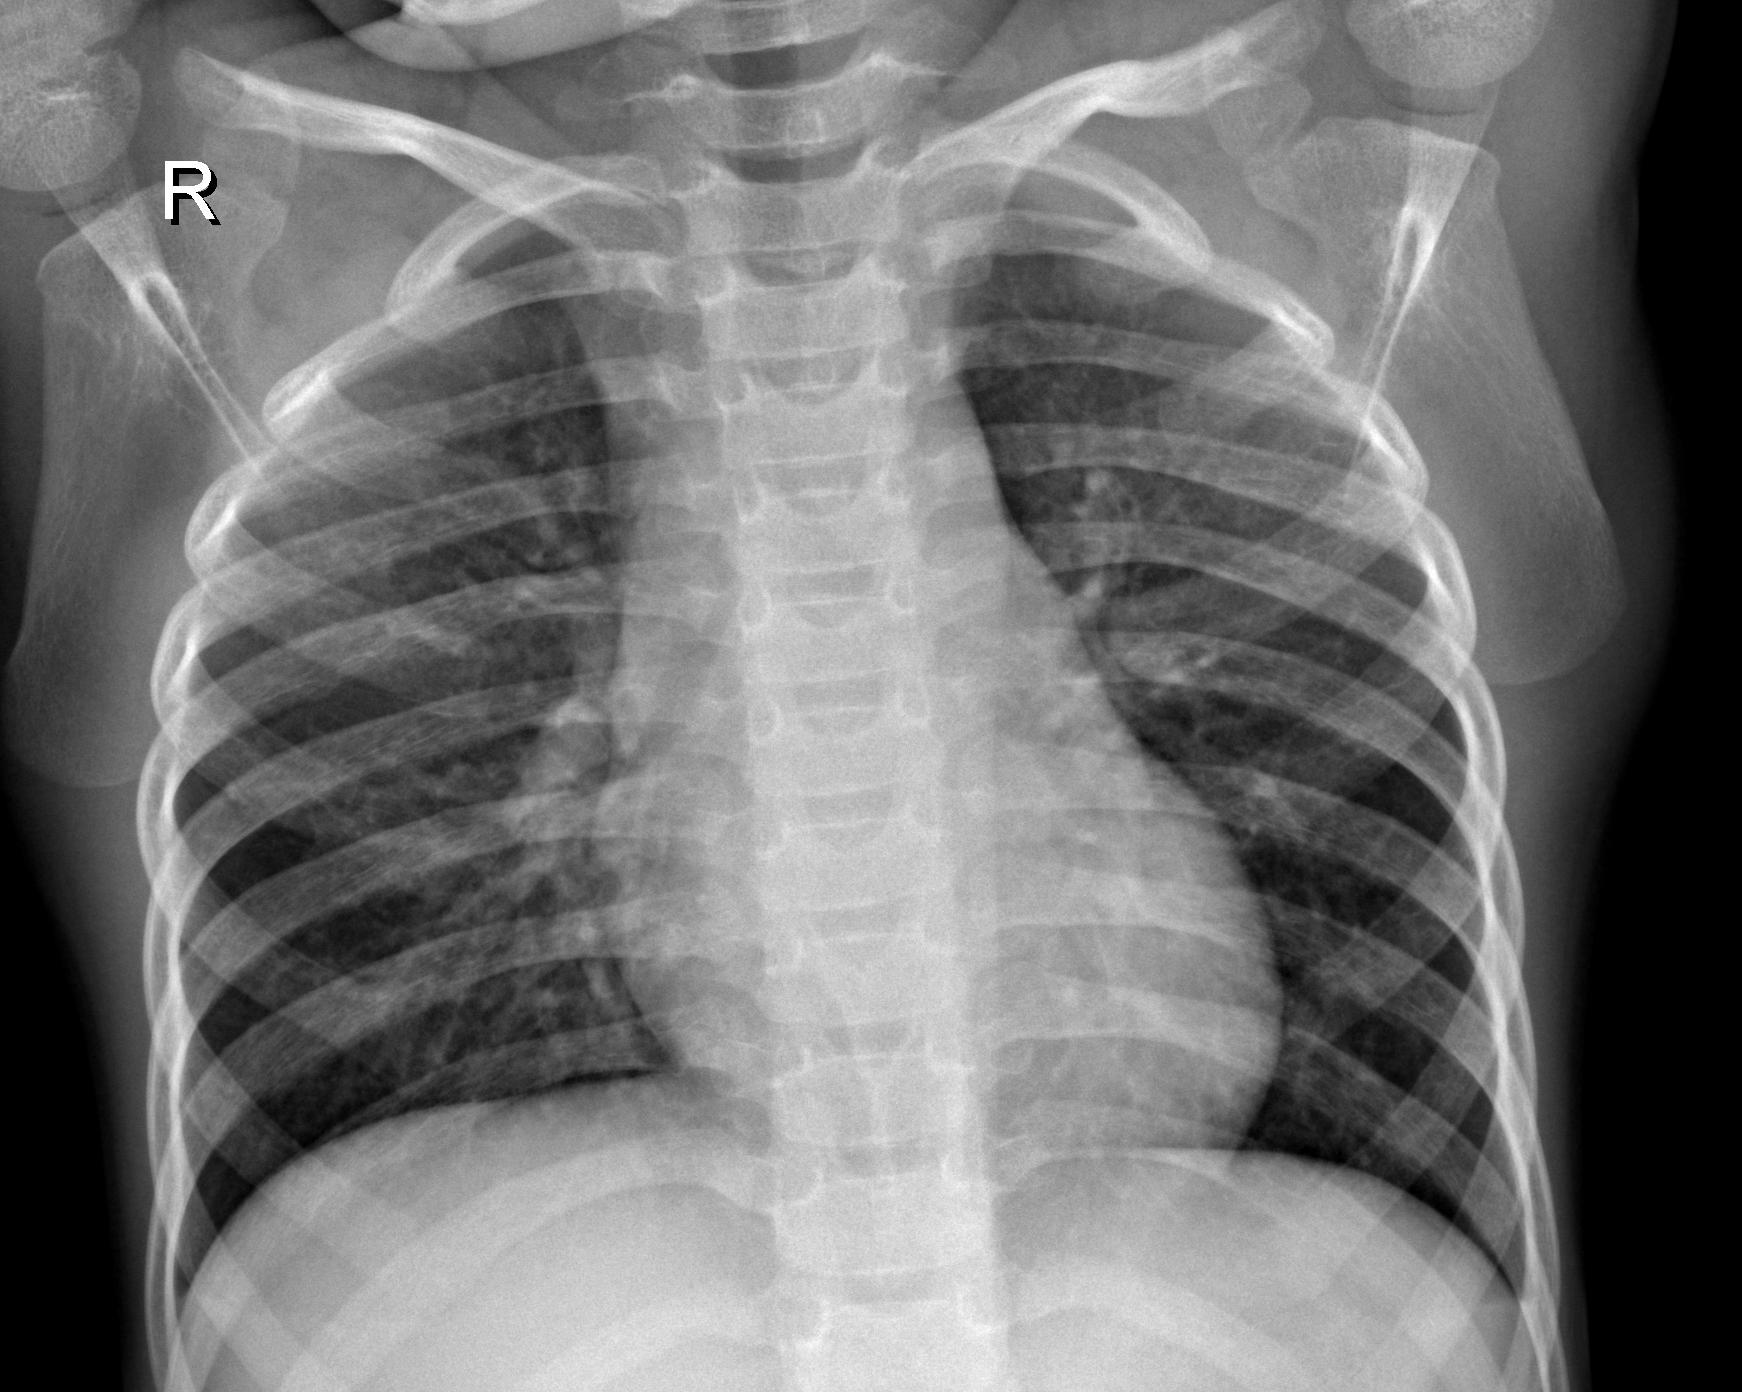

In [9]:
#@title
from PIL import Image
import os

target_dir = "chest_xray/test/NORMAL"
normal_image_paths = os.listdir(target_dir)
for path in normal_image_paths[:3]:
    full_path = os.path.join(target_dir, path)
    im = Image.open(full_path)
    display(im)

"""
Using os.listdir is more reusable than simply copy-pasting the desired image file
paths into the Image.open() command.
"""

## Exercise 2

Next, using your code from the previous exercise, create a function that will show a certain number of images from either the normal or pneumonia directories. Use this to display some of the pneumonia XRs from the test dataset. The number of images requested and the label should be passed as arguments.

*Try to think about error handling when designing this function - when might the function fail?*

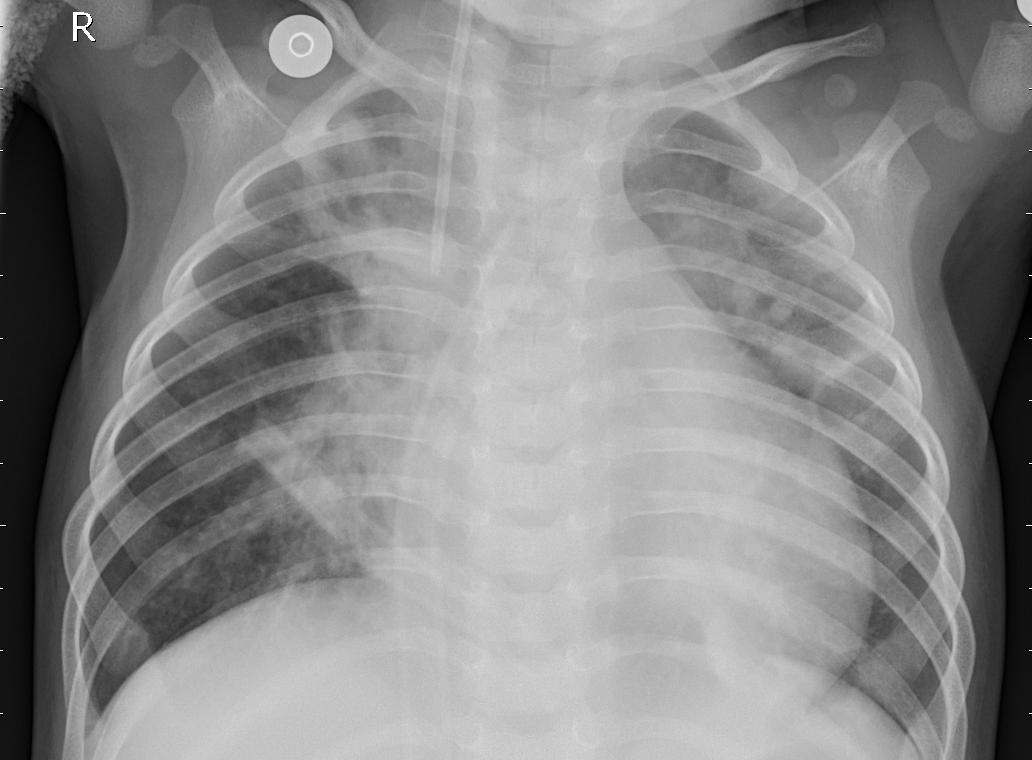

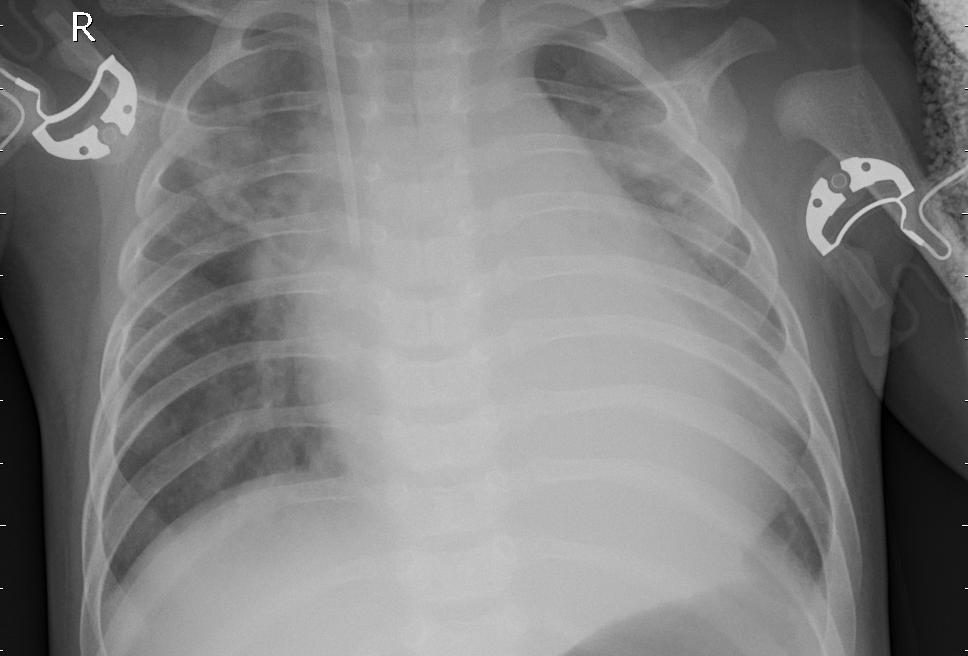

Exception: Too many images (100000) requested!

In [13]:
def show_images(label, num_images=3):

    target_dir = "chest_xray/test/{}".format(label)
    image_paths = os.listdir(target_dir)

    if num_images > len(image_paths):
        raise Exception(f"Too many images ({num_images}) requested!")

    for path in image_paths[:num_images]:
        full_path = os.path.join(target_dir, path)
        im = Image.open(full_path)
        display(im)

show_images("PNEUMONIA", 2)
show_images("PNEUMONIA", 100000)

"""
Using string formatting on line 3 here allows for clear insertion of the desired label
into the target directory. Appending the strings with "+" would also be appropriate.
Use of "os.path.join" is good practice, rather than stitching together the string manually with "/"
as it is less error prone.

Always think about catching errors - what if the number of images
requested was larger than the number available in the directory?
"""

## Exercise 3

Write a simple script which reports the total number of images in each partition (test/train/validation) and each label (normal/pneumonia) of the dataset.

*NB: again, ignore the* `chest_xray/chest_xray` *subdirectory.*

In [26]:
def report_dir(partition, file_path="chest_xray", labels=["NORMAL", "PNEUMONIA"]):

    file_path = os.path.join(file_path, partition)

    for label in labels:
        imgs = os.path.join(file_path, label)
        img_num = len(os.listdir(imgs))
        print(f"\t{label}: {img_num}")

print("Training data: ")
report_dir("train")

print("Testing data: ")
report_dir("test")

print("Validation data: ")
report_dir("val")

Training data: 
	NORMAL: 1341
	PNEUMONIA: 3875
Testing data: 
	NORMAL: 234
	PNEUMONIA: 390
Validation data: 
	NORMAL: 8
	PNEUMONIA: 8


'\nThere is no right/wrong way to write this code, and there are multiple ways to \nachieve the task in the exercise. In general, code should be duplicated as little\nas possible whilst still maintaining clarity about what it does. It is very easy \nto obfuscate code with the single goal of making it take up fewer lines.\n\nAs the structure of each partition directory is identical, it makes sense to write a \nreport_dir function which prints the report for any of the three directory.\n\nI have passed the file_path and labels as arguments to make the function \nreusable - what if we had a similar dataset for NORMAL/PE which was\ncalled chest_ct?\n'

**Solution breakdown**

There is no right/wrong way to write this code, and there are multiple ways to
achieve the task in the exercise. In general, code should be duplicated as little
as possible whilst still maintaining clarity about what it does. It is very easy
to obfuscate code with the single goal of making it take up fewer lines.

As the structure of each partition directory is identical, it makes sense to write a
report_dir function which prints the report for any of the three directory.

I have passed the file_path and labels as arguments to make the function
reusable - what if we had a similar dataset for NORMAL/PE which was
called chest_ct?

This gives you an idea of the overall size of the dataset we are working with. We can see from the output of this function that we have many more abnormal X-rays than normal ones in the training partition - how might this affect training?

# Stage 2 - Preprocessing

Preprocessing refers to preparing the data for training a machine learning system. It is often the most time-consuming part of designing a machine learning system.

All machine learning training methods require data to be in a certain format. This is because the model's input layer has a certain shape, which has to be matched by our input image. For images, these constraints can include:

1. **Input image size** - in our case, most images are far higher resolution than it would be possible to build a convolutional neural network to process. You will be able to test this later in the practical.
2. **Input image dimensions** - often, networks require square images to make computations easier.
3. **Input image channels** - often, images need to be greyscale. Luckily, this is not an issue for us.

Over the next few exercises, we will build up a function that is able to do this, before considering later stages of pre-processing.

## Exercise 4

Let's consider a single image to make the process of code design easier. Write a function that takes an image filepath, opens the image, and appropriately center crops it to a set of dimensions that is passed as an argument. All images returned from the function must be square.

Hint: use [this StackOverflow issue](https://stackoverflow.com/questions/16646183/crop-an-image-in-the-centre-using-pil) to help you.

## Solution

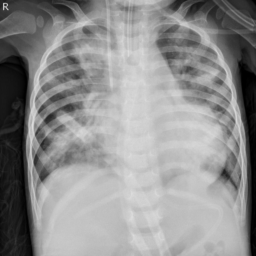

'\nI decided to import and use a function from the Torch library here, as\nit is simple and will cover cases that might cause errors in a simple\nimplementation. Torch is a machine learning library, and the presence of\nthis function in the library shows how common an issue this is for \ndata scientists.\n\nAs we want all images from the function to be square, there is no reason\nto pass in 2D dimensions to the function, as they will always be the \nsame e.g. (64, 64)\n'

In [25]:
from torchvision.transforms import functional as F

def crop_and_scale(img, target_size):

    # Crop the center of the image
    height, width = img.size
    square_size = min(height, width)
    img = F.center_crop(img, square_size)

    # Resize the image
    return F.resize(img, (target_size, target_size))

test_im = "chest_xray/train/PNEUMONIA/person986_bacteria_2913.jpeg"
im = Image.open(test_im)

im = crop_and_scale(im, 256)
display(im)

**Solution Breakdown**

I decided to import and use a function from the Torch library here, as
it is simple and will cover cases that might cause errors in a simple
implementation. Torch is a machine learning library, and the presence of
this function in the library shows how common an issue this is for
data scientists.

As we want all images from the function to be square, there is no reason
to pass in 2D dimensions to the function, as they will always be the
same e.g. (64, 64)

## Exercise 5 - Specifying constraints

Let's extend our preprocessing function. The machine learning model will be accepting the images in array form. Each image must have:

1. Only 1 channel (greyscale)
2. All values must be between `0.0` and `1.0`

Use your test image and preprocessing function from the last code block and inspect the images in NumPy array format to confirm that they meet the two constraints. What do you notice?

### Solution

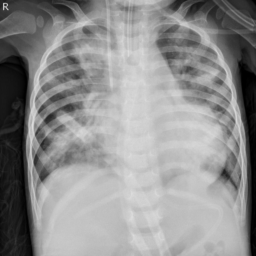

(256, 256)
220 0


In [34]:
import numpy as np

test_im = "chest_xray/train/PNEUMONIA/person986_bacteria_2913.jpeg"
im = Image.open(test_im)

im = crop_and_scale(im, 256)
display(im)

im_arr = np.array(im) # Convert to Numpy Array

print(im_arr.shape)
print(im_arr.max(), im_arr.min())

**Solution Breakdown**

The image has the appropriate shape and dimensions, but has a max value of much higher than 1.0. This demonstrates that it is still in 8 bit integer format.

## Exercise 6

Appropriately modify the preprocessing function to correct for the problem identified in the previous exercise and to make the function return NumPy arrays rather than PIL Images.

## Solution

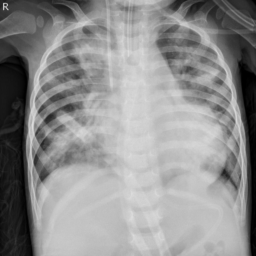

In [78]:
def crop_and_scale(img, target_size):

    # Crop the center of the image
    height, width = img.size
    square_size = min(height, width)
    img = F.center_crop(img, square_size)

    # Resize the image
    resized_im = F.resize(img, (target_size, target_size))

    return np.array(resized_im) / 255.0

test_im = "chest_xray/train/PNEUMONIA/person986_bacteria_2913.jpeg"
im = Image.open(test_im)

im_arr = crop_and_scale(im, 256)

# Code to convert from array back to PIL Image:
im = Image.fromarray((im_arr * 255.0).astype(np.uint8))
display(im)

**Solution breakdown**

The image is converted into a NumPy array with `np.array()` and scaled down by `255.0`, to convert from 8 bit integers (0-255) to floating point numbers (0.0-1.0). This also ensures that the numbers are "normalised" - within a specified range.

# Stage 3 - Batching and Sampling

A machine learning model accepts data in batches. A batch is a small collection of images that are used for one step of training. Every image is passed through the network in its current state, and then the 'errors' are averaged out between the images in the batch to update the weights. This is important to know because:

1. The larger the batch, the more accurate the estimate of the 'direction' the model needs to go in to reduce its error rate.

However, usually a batch needs to be loaded into RAM from the disk/SSD for it to be processed. A batch of uncompressed image data can get very large, very fast!

*Side task - how many bytes of data would a batch of 2048 images at 512x512 pixels be?*

Before we create our batching function, we have to consider how we are going to sample data for each batch. Ideally, each batch should contain similar amounts of each data from each class - in our situation, normal/pneumonia.

However, our dataset is **unbalanced** - there is more pneumonia data than normal data. In order to combat this, we will **oversample** the normal data - the network will "see" the normal data more times than the pneumonia data. This has advantages and disadvantages:

1. It is easy to do.
2. It can lead to overfitting. If the dataset was extremely unbalanced, the model may start to interpret normal anatomical variations as pneumonia, as it has not had adequate exposure to normal data.

Before oversampling data, you should make sure that there is enough diversity in the dataset to allow the model to learn the characteristics that you want.

## The process of training

During the training process, the model will "see" each data point multiple times. When creating the batches, we will use random sampling to ensure good diversity between each batch - no two batches should be the same. This will help the model gain a good average of the "direction" it should move in over successive batches.

## Exercise 7 - Batching data

Write a function that creates batches from a specified directory (test/train/val). Each batch should have a customisable size and should contain equal numbers of normal and pathological images. Make sure you use random sampling for each batch.

1. **Use online sources of information to help you.** StackOverflow can be very helpful for building functions like this.
2. Make sure you think about error handling when designing the function. What combination of input parameters would cause the function to fail?
3. Use the `crop_and_scale` function from Exercise 6 to preprocess the images.
4. Use ideas from the previous exercises to help you get started.
5. It is helpful to plan each step you will need to include for the function with comments.

The function should be called `make_batch`. The function is specified below:

```python
def make_batch(partition, im_size, batch_size):
    """
    Returns an equally balanced batch of images from the chest_xray dataset for training.

    Parameters
    ----------
    partition : str
        The partition to sample from.
    im_size : int
        The square image dimension of the images in the batch.
    batch_size : int
        The desired size of the batch.

    Returns
    -------
    np.array
          Batch of images, stored in a 3D array. Shape: (batch_size, im_size, im_size)

    Examples
    --------
    >>> make_batch("NORMAL", 256, 4).shape
    (4, 255, 255)
    """
```

*NB: This is called a docstring, and is a way to document what your Python function does. It  should provide a description of what your function does and can be shown in code editors like VS Code when you hover over a function name.*

### Solution

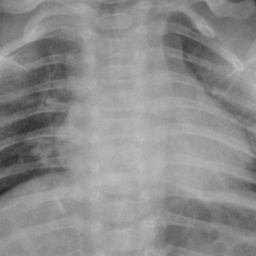

In [80]:
import random

def make_batch(partition, im_size, batch_size):

    root_path = "chest_xray"

    # Construct paths to the relevant directories
    norm_path = os.path.join(root_path, partition, "NORMAL")
    pneu_path = os.path.join(root_path, partition, "PNEUMONIA")

    # Check that the batch size is even
    if batch_size % 2 != 0:
        raise Exception("The batch size ({}) must be even.".format(batch_size))

    sample_size = int(batch_size / 2)

    # Sample an equal number of images from the folder for each label.
    norm_sample_paths = random.sample(os.listdir(norm_path), sample_size)
    pneu_sample_paths = random.sample(os.listdir(pneu_path), sample_size)

    # Get the full directory path for each image.
    norm_sample_paths = [os.path.join(norm_path, x) for x in norm_sample_paths]
    pneu_sample_paths = [os.path.join(pneu_path, x) for x in pneu_sample_paths]
    im_paths = norm_sample_paths + pneu_sample_paths

    # Create the batch array
    batch = np.zeros((batch_size, im_size, im_size))

    # Open and preprocess each image
    for i, im_path in enumerate(im_paths):
        im = Image.open(im_path)
        batch[i] = crop_and_scale(im, im_size)

    return batch

batch = make_batch("test", 256, 4)

# Inspect the images.
im = Image.fromarray((batch[3] * 255.0).astype(np.uint8))
display(im)

**Solution breakdown**

This function documents the stages it goes through in order to generate a batch of images. One potential way to improve it would be to get rid of the duplication of the `NORMAL` and `PNEUMONIA` lines of code for each step of the process - this would be especially helpful if there were more than 2 labels. However, for the purposes of clarity, I have left it as it is.

There is a more error handling that could be performed - what else do you think should be checked?

## Encoding Labels

We now have a way to feed the neural network batches of data. However, the neural network does currently not know what each image represents. In order to do this, we have to preprocess the labels for each batch too.

Our labels for this dataset are "PNEUMONIA" and "NORMAL" - these are strings, discrete data. In order for the network to train on these labels, we have to encode the labels into numbers. This is because the network calculates the error between the output of the network and the labels we provide.

For our network, we will encode 0.0 as "NORMAL", and 1.0 as "PNEUMONIA". This is a **label encoding**, as we are assigning integer values to each label - 0 or 1, NORMAL or PNEUMONIA.

## Difference between label and one-hot encoding

A large proportion of encoding for image datasets in machine learning occurs as one-hot encoding. This sets a 1 for features that are present, and 0 for ones that are not. For example:

```
Data: Image of a cat
Labels: [dog, cat, fish, bear]
Encoding: [0, 1, 0, 0]
```

For our network, this would be:
```
Image: Pneumonia
Labels: [NORMAL, PNEUMONIA]
Encoding: [0, 1]
```

We will use label encoding for simplicity - the network will only have one output neuron:

```
Image: Pneumonia
Labels: [NORMAL, PNEUMONIA]
Encoding: [1]
```


## Exercise 8 - Adding labels